In [641]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np

In [642]:
#read in data and inspect
who = pd.read_csv('all_data.csv')
print(who.head() )
who.columns[0]
who.dtypes

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [643]:
#How large is dataframe (how many entries)?
who.shape[0]

96

In [644]:
#Any missing data?
#Which data types?
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [645]:
#Just renaming for ease
who['Country'] = who['Country'].astype('category')
who['Country'] = who['Country'].cat.rename_categories({'Chile': 'Chile', 'China': 'China', 'Germany': 'Germany', 'Mexico': 'Mexico', 'United States of America': 'USA', 'Zimbabwe': 'Zimbabwe'})
who.rename(columns = {'Life expectancy at birth (years)': 'Life_expectancy'}, inplace=True)

#Log transform GDP to make visualisation easier
who['GDP_log'] = np.log10(who['GDP'])


In [646]:
#Generate summary stats
who.describe()


,Year,Life_expectancy,GDP,GDP_log
count,96.000000,96.000000,9.600000e+01,96.000000
mean,2007.500000,72.789583,3.880499e+12,11.879120
std,4.633971,10.672882,5.197561e+12,1.087501
min,2000.000000,44.300000,4.415703e+09,9.645000
25%,2003.750000,74.475000,1.733018e+11,11.238801
50%,2007.500000,76.750000,1.280220e+12,12.107241
75%,2011.250000,78.900000,4.067510e+12,12.608160
max,2015.000000,81.000000,1.810000e+13,13.257679


In [647]:
#Generate summary stats by Country
who.groupby('Country').describe()

Year                                                              \
         count    mean       std     min      25%     50%      75%     max   
Country                                                                      
Chile     16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   
China     16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   
Germany   16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   
Mexico    16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   
USA       16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   
Zimbabwe  16.0  2007.5  4.760952  2000.0  2003.75  2007.5  2011.25  2015.0   

         Life_expectancy            ...           GDP               GDP_log  \
                   count      mean  ...           75%           max   count   
Country                             ...                                       
Chile               16.0  78.94375  ...  2.449515e+11  2.783840e+11    16.0   
China               16.0  74.26250  ...  7.819550e+12  1.106470e+13    16.0   
Germany             16.0  79.65625  ...  3.596078e+12  3.890610e+12    16.0   
Mexico              16.0  75.71875  ...  1.156992e+12  1.298460e+12    16.0   
USA                 16.0  78.06250  ...  1.567500e+13  1.810000e+13    16.0   
Zimbabwe            16.0  50.09375  ...  1.263446e+10  1.630467e+10    16.0   

                                                                           \
               mean       std        min        25%        50%        75%   
Country                                                                     
Chile     11.180333  0.224071  10.843462  10.970248  11.238037  11.389017   
China     12.578339  0.342054  12.083270  12.273464  12.606542  12.892557   
Germany   12.479788  0.103750  12.290023  12.437334  12.531004  12.555695   
Mexico    11.980012  0.095844  11.834833  11.882518  12.001567  12.063320   
USA       13.142147  0.077161  13.012837  13.082603  13.159865  13.195128   
Zimbabwe   9.914099  0.196640   9.645000   9.759539   9.828243  10.100444   

                     
                max  
Country              
Chile     11.444644  
China     13.043940  
Germany   12.590018  
Mexico    12.113429  
USA       13.257679  
Zimbabwe  10.212312  

[6 rows x 32 columns]

Text(0.5, 1.0, 'Boxplot of life expectancy (years) by country')

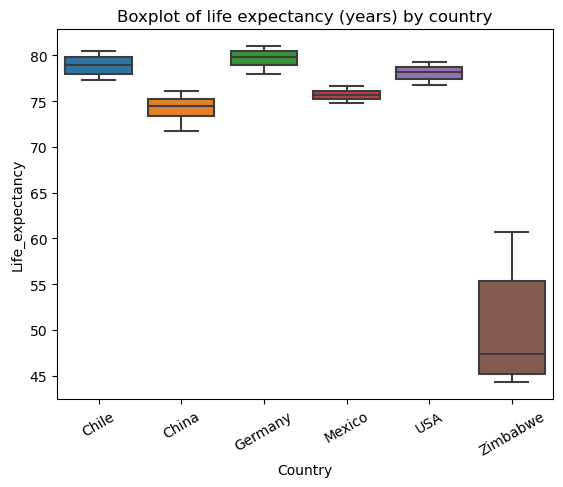

In [648]:
#I am particularly interested in life expectancy, and the factors that might impact on this
#I first generate boxplot of life expectancy by Country
sns.boxplot(x = 'Country', y = 'Life_expectancy', data = who)
plt.xticks(rotation = 30)
plt.title('Boxplot of life expectancy (years) by country')

Text(0.5, 1.0, 'Boxplot of GDP (log transformed) by country')

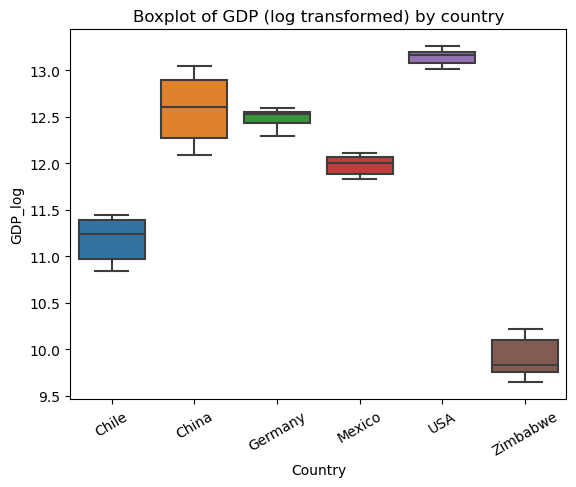

In [649]:
#Next I examine (log transformed) GDP by country
sns.boxplot(x = 'Country', y = 'GDP_log', data = who)
plt.xticks(rotation = 30)
plt.title('Boxplot of GDP (log transformed) by country')

Text(0.5, 1.0, 'GDP (log transformed) by year for each country')

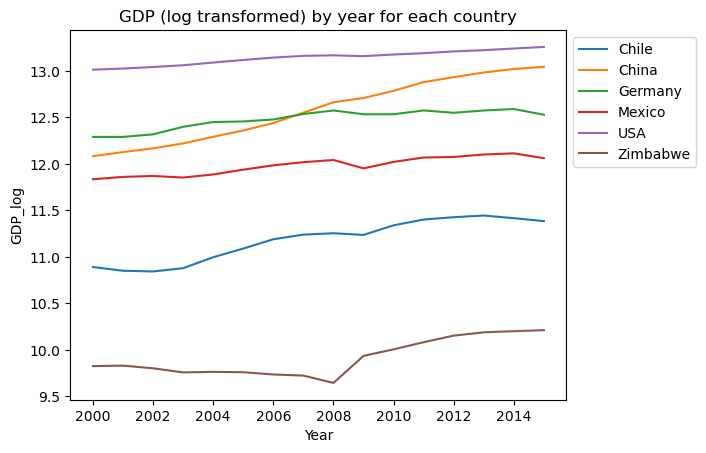

In [650]:
#The easiest way to look at changes over time (GDP) by year and Country is a lineplot
#Need to move legend outside of the plot
sns.lineplot(x='Year', y='GDP_log', data=who, hue='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("GDP (log transformed) by year for each country")

Text(0.5, 1.0, 'Life expectancy trends across time by country')

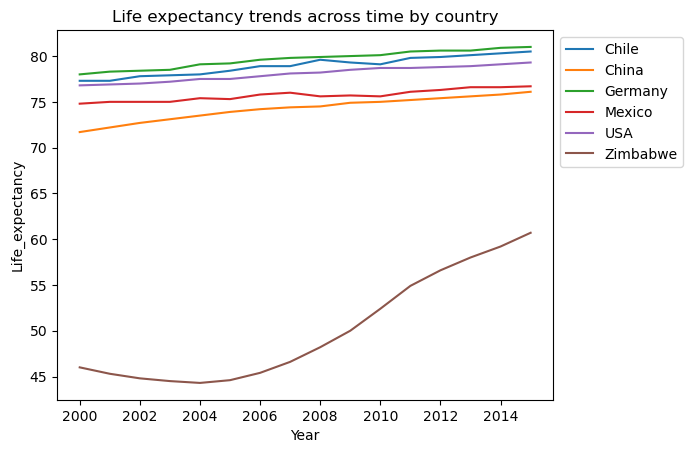

In [651]:
#Using the same rationale, an examination of life expectancy:
sns.lineplot(x='Year', y='Life_expectancy', data=who, hue='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Life expectancy trends across time by country")

/Users/nmw147/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP', ylabel='Life_expectancy'>

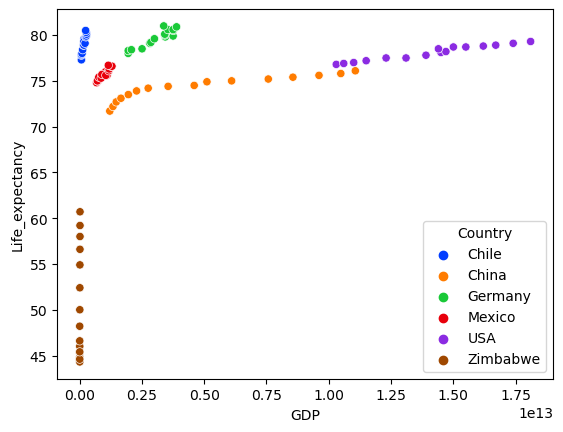

In [652]:
#Clearly both GDP and life expectancy differ by country and across time,
#but what is the relationnship between life expectancy and GDP?

sns.scatterplot(who['GDP'], who['Life_expectancy'], hue = who['Country'], palette = 'bright')

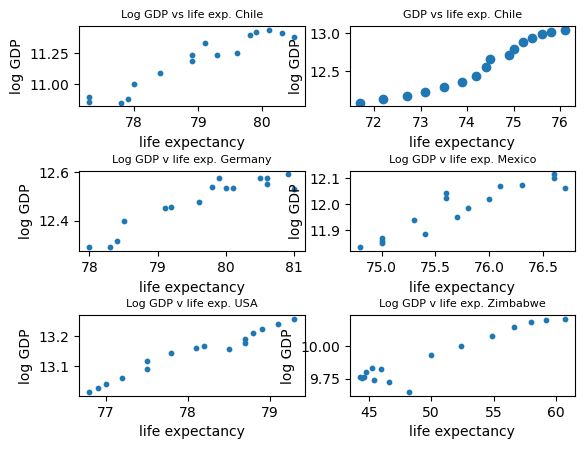

In [653]:
#Scatterplot looks a little strange, and so I have generated subplots by country. 
#I need to do sme more styling of the syntax for adjusting plots, but this is what I generated
#for now
Chile = who[who.Country == 'Chile']
China = who[who.Country == 'China']
Germany = who[who.Country == 'Germany']
Mexico = who[who.Country == 'Mexico']
USA = who[who.Country == 'USA']
Zimbabwe = who[who.Country == 'Zimbabwe']
fig, axs = plt.subplots(3, 2)
plt.subplots_adjust(hspace = 0.8)
axs[0, 0].scatter(Chile.Life_expectancy, Chile.GDP_log, s = 10)
axs[0, 0].set_title('Log GDP vs life exp. Chile', fontsize = 8)
axs[0, 1].scatter(China.Life_expectancy, China.GDP_log)
axs[0, 1].set_title('GDP vs life exp. Chile', fontsize = 8)
axs[1, 0].scatter(Germany.Life_expectancy, Germany.GDP_log, s = 10)
axs[1, 0].set_title('Log GDP v life exp. Germany', fontsize = 8)
axs[1, 1].scatter(Mexico.Life_expectancy, Mexico.GDP_log, s = 10)
axs[1, 1].set_title('Log GDP v life exp. Mexico', fontsize = 8)
axs[2, 0].scatter(USA.Life_expectancy, USA.GDP_log, s = 10)
axs[2, 0].set_title('Log GDP v life exp. USA', fontsize = 8)
axs[2, 1].scatter(Zimbabwe.Life_expectancy, Zimbabwe.GDP_log, s = 10)
axs[2, 1].set_title('Log GDP v life exp. Zimbabwe', fontsize = 8)

for ax in axs.flat:
    ax.set(xlabel='life expectancy', ylabel='log GDP')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()



In [654]:
#Generate multiple regression model for prediction
model = sm.OLS.from_formula('Life_expectancy ~ Year + Country + GDP', who)
results = model.fit()
print(results.summary() )



                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.43e-56
Time:                        09:43:17   Log-Likelihood:                -217.48
No. Observations:                  96   AIC:                             449.0
Df Residuals:                      89   BIC:                             466.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0859    

In [655]:
print(results.params)

Intercept             -8.593367e-02
Country[T.China]      -6.173685e+00
Country[T.Germany]    -2.046170e-01
Country[T.Mexico]     -3.487908e+00
Country[T.USA]        -5.183469e+00
Country[T.Zimbabwe]   -2.881618e+01
Year                   3.935071e-02
GDP                    3.082067e-13
dtype: float64


In [656]:
fitted_values = results.predict(who)
print(fitted_values.head() )

0    78.639491
1    78.676721
2    78.715689
3    78.756860
4    78.803474
dtype: float64


(array([ 6.,  2.,  6., 70.,  7.,  0.,  1.,  1.,  1.,  2.]),
 array([-5.65850743, -4.06211681, -2.46572618, -0.86933555,  0.72705507,
         2.3234457 ,  3.91983633,  5.51622695,  7.11261758,  8.7090082 ,
        10.30539883]),
 <BarContainer object of 10 artists>)

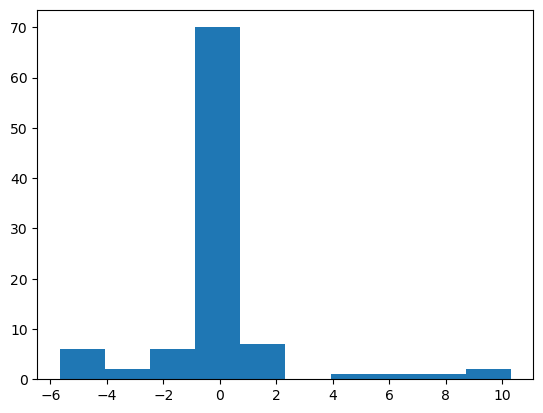

In [657]:
residuals = who.Life_expectancy - fitted_values
plt.hist(residuals)